## How many articles mention contact tracing (vs. entire coronavirus corpus) per country?

Analysis to obtain three proportions:

### Proportion 1
Count of articles found by searching keyword / total article

### Proportion 2
Count of articles that scored significantly on contact tracing latent topic/ total articles

### Proportion 3
Count of articles that scored significantly on contact tracing latent topic/ Count of articles found by searching contact tracing keyword (Proportion 2 / Proportion 1). Proportion 3 tells us how sensitive latent topics are, relative to a conventional keyword search.

### Clarifying definitions:
* `contact tracing keyword articles`: number of articles in the entire corpus that contain a keyword search of "contact tracing"
* `latent topic articles`: number of articles in the entire corpus that contain the latent "contact tracing" topic (after topic modeling)

In [1]:
import pandas as pd
import pickle
from dateutil import parser
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


In [2]:
us = pd.read_pickle("us/data/us_proc.pkl")
kor = pd.read_pickle("korea/data/korean_proc.pkl")
taiwan = pd.read_csv("taiwan/data/text_proc.csv")
hk_eng = pd.read_csv("hong kong/data/hk_eng_proc.csv")
hk_ch = pd.read_csv("hong kong/data/hk_ch_proc.csv")
singapore = pd.read_csv("singapore/data/text_proc.csv")

In [99]:
# def get_week_of_year(date):
#     if (type(date) == str):
#         date = parser.parse(date)
#     if (type(date) == float):
#         print(date)
#     year, week_of_year, day_of_week = date.isocalendar()
#     return week_of_year

# kor = kor[~kor.date.isna()]

# us.loc[:, 'week_of_year'] = us.date.apply(lambda d: get_week_of_year(d))
# kor.loc[:, 'week_of_year'] = kor.date.apply(lambda d: get_week_of_year(d))
# taiwan.loc[:, 'week_of_year'] = taiwan.date.apply(lambda d: get_week_of_year(parser.parse(d)))
# hk_eng.loc[:, 'week_of_year'] = hk_eng.date.apply(lambda d: get_week_of_year(parser.parse(d)))
# hk_ch.loc[:, 'week_of_year'] = hk_ch.date.apply(lambda d: get_week_of_year(parser.parse(d)))

The articles that have the "contact tracing" keyword in the text

In [6]:
us.loc[:, "contact_tracing"] = us.text_proc.str.contains("contact tracing|contact-tracing|contact tracking|contact-tracking")
kor.loc[:, "contact_tracing"] = kor.text_proc.str.contains("역학 조사|확진자 추적|컨택트 트레이싱|추적 조사|접촉자 추적|동선 추적")
taiwan.loc[:, "contact_tracing"] = taiwan.text_proc.str.contains("接觸 追蹤|持續 追蹤|接觸者 追蹤|追蹤 接觸者")
hk_ch.loc[:, "contact_tracing"] = hk_ch.text_proc.str.contains("接觸 追蹤|接觸者 追蹤|追蹤 接觸者|流行病學 調查")
hk_eng.loc[:, "contact_tracing"] = hk_eng.text_proc.str.contains("contact tracing|contact-tracing|contact tracking|contact-tracking")
singapore.loc[:, "contact_tracing"] = singapore.text_proc.str.contains("contact tracing|contact-tracing|contact tracking|contact-tracking")


In [7]:
us_ct = len(us[us.contact_tracing == True])
kor_ct = len(kor[kor.contact_tracing == True])
taiwan_ct = len(taiwan[taiwan.contact_tracing == True])
hk_ch_ct = len(hk_ch[hk_ch.contact_tracing == True])
hk_eng_ct = len(hk_eng[hk_eng.contact_tracing == True])
singapore_ct = len(singapore[singapore.contact_tracing == True])

The articles that include the "contact tracing" latent topic

In [8]:
country = "us"
us_discrete_dtm = pd.read_csv(f"{country}/proc/discrete_dtm.csv")

country = "korea"
kor_discrete_dtm = pd.read_csv(f"{country}/proc/discrete_dtm.csv")

country = "hong kong"
hk_eng_discrete_dtm = pd.read_csv(f"{country}/proc/eng/discrete_dtm.csv")

country = "hong kong"
hk_ch_discrete_dtm = pd.read_csv(f"{country}/proc/ch/discrete_dtm.csv")

country = "singapore"
singapore_discrete_dtm = pd.read_csv(f"{country}/proc/discrete_dtm.csv")

# country = "taiwan"
# taiwan_discrete_dtm = pd.read_csv(f"{country}/proc/discrete_dtm.csv")

In [9]:
us_latent_articles = sum(us_discrete_dtm["Topic75"])
kor_latent_articles = sum(kor_discrete_dtm["Topic214"])
hk_ch_latent_articles = sum(hk_ch_discrete_dtm["Topic91"])
hk_eng_latent_articles = sum(hk_eng_discrete_dtm["Topic39"])
singapore_latent_articles = sum(hk_eng_discrete_dtm["Topic28"])

In [10]:
ct_articles = [
    [us_ct, us_latent_articles, 500, len(us)], 
    [kor_ct, kor_latent_articles, 500, len(kor)], 
    [taiwan_ct, 0, 500, len(taiwan)], 
    [hk_ch_ct, hk_ch_latent_articles, 500, len(hk_ch)], 
    [hk_eng_ct, hk_eng_latent_articles, 100, len(hk_eng)],
    [singapore_ct, singapore_latent_articles, 300, len(singapore)]
]

In [11]:
df = pd.DataFrame(data=ct_articles,
             index=['us', 'korea', 'taiwan', 'hong kong chinese', 'hong kong english', 'singapore'], 
             columns=['contact tracing keyword articles', 'latent topic articles', 'num topics', 'total articles'])

In [12]:
df['contact tracing keyword articles'] = df['contact tracing keyword articles'].astype(int)
df['latent topic articles'] = df['latent topic articles'].astype(int)
df['num topics'] = df['num topics'].astype(int)
df['total articles'] = df['total articles'].astype(int)

In [13]:
df.loc[:, 'P1: keyword articles/total articles'] = df['contact tracing keyword articles']/df['total articles'] * 100
df.loc[:, 'P2: latent topic articles/total articles'] = df['latent topic articles']/df['total articles'] * 100
df.loc[:, 'P3: latent topic articles/keyword articles'] = df['latent topic articles']/df['contact tracing keyword articles'] * 100


In [14]:
df

,contact tracing keyword articles,latent topic articles,num topics,total articles,P1: keyword articles/total articles,P2: latent topic articles/total articles,P3: latent topic articles/keyword articles
us,1836,1438,500,51541,3.562213,2.790012,78.322440
korea,2732,1250,500,51250,5.330732,2.439024,45.754026
taiwan,344,0,500,84900,0.405183,0.000000,0.000000
hong kong chinese,135,230,500,22525,0.599334,1.021088,170.370370
hong kong english,385,136,100,4822,7.984239,2.820406,35.324675
singapore,846,79,300,15488,5.462293,0.510072,9.338061


### Confusion Matrix
{detected, not detected by latent topic} x {detected, not detected by keyword}

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [29]:
cf_matrix = confusion_matrix(us_discrete_dtm["Topic75"].values,  us.contact_tracing * 1)
print(cf_matrix)

[[49688   415]
 [   17  1421]]


In [30]:
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


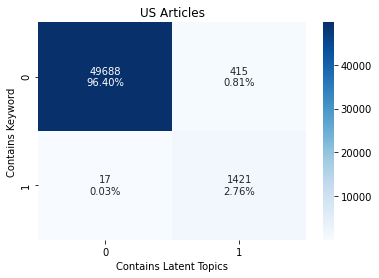

In [31]:
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Contains Latent Topics")
plt.ylabel("Contains Keyword")
plt.title("US Articles")
plt.show()

In [32]:
def get_cf_labels(cf_matrix):
    # https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    return labels

In [36]:
countries = ["US", "Korea", "Hong Kong Chinese", "Hong Kong English", "Singapore"]

latents = [us_discrete_dtm["Topic75"], kor_discrete_dtm["Topic214"], 
           hk_ch_discrete_dtm["Topic91"], hk_eng_discrete_dtm["Topic39"], singapore_discrete_dtm["Topic28"]]

keywords = [us.contact_tracing, kor.contact_tracing, 
            hk_ch.contact_tracing, hk_eng.contact_tracing, singapore.contact_tracing]

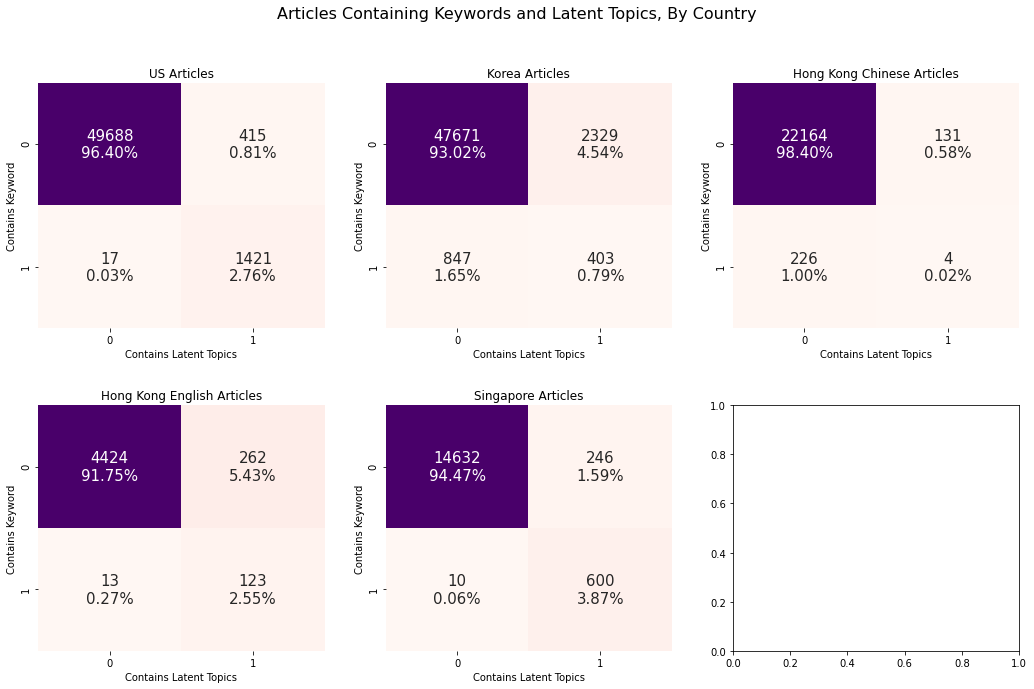

In [44]:


# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10), constrained_layout=True)
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(15,10))


for (country, latent, keyword, ax) in zip(countries, latents, keywords, [ax1, ax2, ax3, ax4, ax5]): 
    cf_matrix = confusion_matrix(latent,  keyword * 1)
    sns.heatmap(cf_matrix, annot=get_cf_labels(cf_matrix), 
                fmt='', cmap='RdPu', ax=ax, cbar=False, annot_kws={"size": 15})
    ax.set_xlabel("Contains Latent Topics")
    ax.set_ylabel("Contains Keyword")
    ax.set_title(f"{country} Articles")

# fig.tight_layout(pad=3.0)
fig.suptitle("Articles Containing Keywords and Latent Topics, By Country", fontsize=16)

fig.tight_layout(pad=3.0)

plt.show()